### Some basic use of Librosa to understand what it does and examine its output

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

#### Load a track and view as waveform

C:\Users\orovi\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


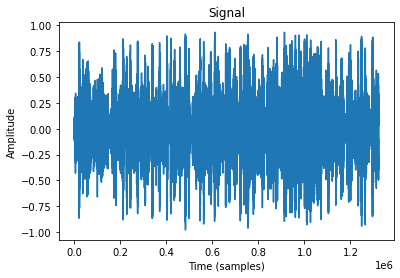

In [2]:
y, sr = librosa.load('../fma/clips/000002.mp3', sr=None, mono=True)
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

#### Generate a spectogram

C:\Users\orovi\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\orovi\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\orovi\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


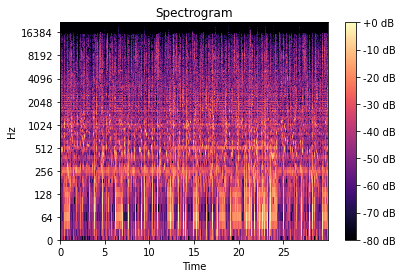

In [3]:
spec = np.abs(librosa.stft(y))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

#### examine spectogram values

In [4]:
print(spec.shape)
print(spec[0:10, 0:10])

(1025, 2582)
[[-80.       -80.       -56.75731  -52.007763 -61.683395 -54.078976
  -58.11452  -54.796494 -50.274097 -43.846413]
 [-80.       -80.       -56.487427 -50.18005  -49.51021  -52.13343
  -57.12272  -50.317898 -46.259964 -44.367847]
 [-80.       -78.855804 -57.426937 -51.324894 -52.179066 -53.190968
  -54.19851  -48.576668 -56.906647 -48.463512]
 [-80.       -77.88318  -61.955803 -58.214516 -70.78506  -56.81579
  -56.97805  -49.668674 -51.882076 -55.516888]
 [-80.       -70.73883  -59.729492 -68.53789  -64.585846 -57.445496
  -53.70539  -54.602715 -51.969334 -63.258247]
 [-80.       -60.138763 -50.82535  -49.043995 -49.958447 -47.478928
  -52.938263 -55.555428 -52.117855 -46.402584]
 [-80.       -52.645855 -48.46565  -41.857056 -39.88201  -43.936344
  -48.343838 -48.306995 -45.917908 -41.81842 ]
 [-80.       -47.25185  -42.353344 -39.512463 -33.903164 -41.74235
  -46.589302 -48.142326 -47.954254 -44.302822]
 [-80.       -43.41815  -33.470543 -29.911158 -31.530216 -40.472137
  

#### generate a mel-spectogram

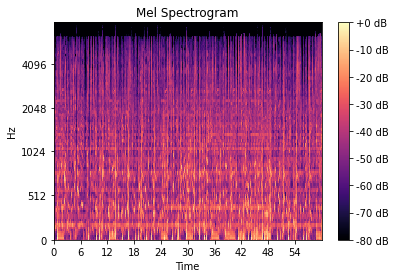

In [5]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

#### examine melspectogram values

128 mel-scale frequencies

In [6]:
print(mel_spect.shape)
print(mel_spect[0:10, 0:10])

(128, 2582)
[[-80.       -80.       -56.288628 -50.065228 -49.947353 -51.98319
  -54.89687  -48.802628 -48.07007  -45.215908]
 [-80.       -74.66728  -58.71488  -54.2287   -56.548714 -54.339554
  -54.247486 -48.48718  -51.43583  -51.39582 ]
 [-80.       -62.926895 -53.349285 -52.21482  -53.06111  -50.13105
  -52.64594  -53.497646 -51.13685  -49.514656]
 [-80.       -51.74206  -46.777065 -41.755386 -38.882    -43.439117
  -48.081882 -48.57586  -46.322475 -42.047344]
 [-80.       -44.823475 -36.529243 -33.06073  -32.21962  -40.363483
  -46.497925 -46.526318 -45.170395 -42.611343]
 [-80.       -40.863796 -29.960873 -28.98384  -33.260696 -38.333344
  -48.092716 -48.055874 -47.029324 -42.54594 ]
 [-80.       -38.16014  -27.567867 -29.376495 -34.365776 -35.64357
  -36.69052  -40.047245 -40.423656 -38.71714 ]
 [-80.       -38.699673 -27.914402 -29.143822 -28.046463 -27.875782
  -27.566381 -28.585463 -29.049252 -29.019215]
 [-80.       -39.589172 -28.399189 -26.769073 -28.094612 -27.67553
  -2

#### generate tonnetz and chroma

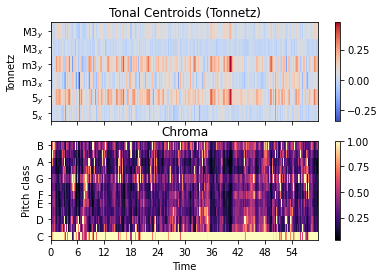

In [7]:
y = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()

chroma = librosa.feature.chroma_cqt(y, sr=sr)
img2 = librosa.display.specshow(chroma,
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

#### examine chroma values

12 pitch bins

In [8]:
print(chroma.shape)
print(chroma[0:10, 0:10])

(12, 2582)
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.9248476  0.7755849  0.5475821  0.41056553 0.36538234 0.3710023
  0.34162673 0.2808578  0.3537952  0.44185242]
 [0.55317277 0.46837196 0.37492016 0.297793   0.28227562 0.27933356
  0.27092808 0.25688654 0.291458   0.30520397]
 [0.3765714  0.34781614 0.38506344 0.34223747 0.3236573  0.3413633
  0.35520032 0.37116846 0.38045803 0.34321305]
 [0.35668024 0.34485728 0.29492846 0.27640045 0.3116997  0.355833
  0.34776327 0.32521695 0.31604427 0.2988705 ]
 [0.5702851  0.50099    0.38463283 0.32934678 0.32329524 0.30955967
  0.26729256 0.24196228 0.24853805 0.23252442]
 [0.5797112  0.4907106  0.3569493  0.27512166 0.2589055  0.27115843
  0.26367718 0.22652377 0.2252568  0.20448266]
 [0.34379753 0.32731086 0.31960303 0.32734624 0.36908072 0.36282203
  0.3436702  0.29157427 0.3040203  0.31400305]
 [0.5096666  0.41605914 0.31808224 0.26572326 0.26337105 0.27486905
  0.20718081 

#### Estimate a static tempo from a sample clip

In [9]:
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo

array([126.04801829])

#### Estimate a dynamic tempo

returns an array of tempos (per frame)

In [10]:
dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr,
                            aggregate=None)
dtempo.shape, dtempo[0:5]

((2582,),
 array([139.67483108, 139.67483108, 139.67483108, 139.67483108,
        139.67483108]))

#### Estimate and display a tempogram

C:\Users\orovi\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


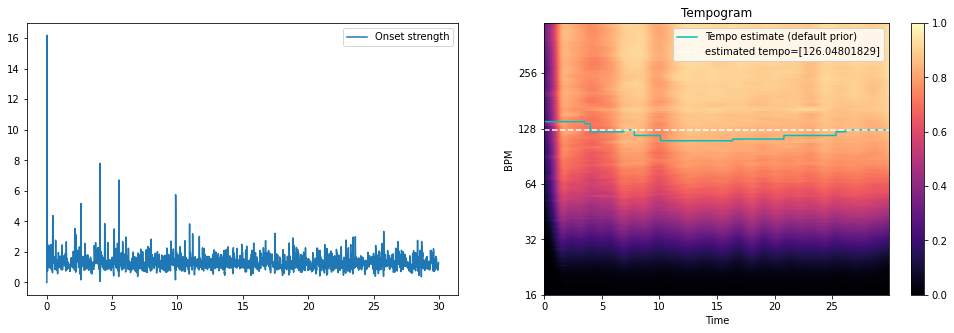

In [18]:
hop_length=512
tempogram = librosa.feature.tempogram(onset_envelope=onset_env,sr=sr,
                                     hop_length=hop_length)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)


fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(17, 5))
ax[0].plot(times, onset_env, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)

img1 = librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].plot(librosa.times_like(dtempo), dtempo,
         color='c', linewidth=1.5, label='Tempo estimate (default prior)')
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
              label=f'estimated tempo={tempo}')
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
fig.colorbar(img1, ax=[ax[1]])

C:\Users\orovi\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


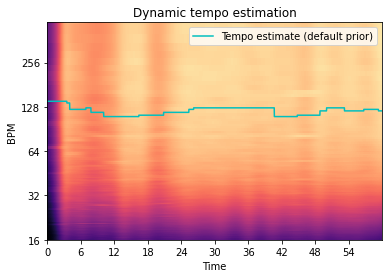

In [16]:
ax.set(title='Dynamic tempo estimation')
ax.legend()